Titanic Project
Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

Note: You can find the dataset in the link below.
Downlaod Files:
https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv

In [92]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.preprocessing import power_transform
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics  import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [93]:
Titanic=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [94]:
Titanic.shape

(891, 12)

In [95]:
Titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [96]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [97]:
Titanic.columns = Titanic.columns.str.replace(' ', '_')
Titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [98]:
Titanic.isnull().sum()     #no Missing Values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 Huge Null values in Cabin but this columns is irrelevent so drop it  from dataset

In [99]:
Titanic = Titanic.drop(['Cabin'],axis=1)

# dropped cabin from the dataset

In [100]:
Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Now Lets fill NaN Values

In [101]:
#  remove Outliers By Fillna method using mean bcz data is continious in Age 

Titanic['Age']= Titanic['Age'].fillna(Titanic['Age'].mean())

In [102]:
 # remove the Outliers By Fillna method using mode bcz data is catagorical in Embarked 

Titanic['Embarked']= Titanic['Embarked'].fillna(Titanic['Embarked'].mode()[0])

In [103]:
Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [104]:
#dropping duplicate rows and resetting index
Titanic=Titanic.drop_duplicates()
print('Number of rows after removing duplicates=', len(Titanic))

Number of rows after removing duplicates= 891


<AxesSubplot:>

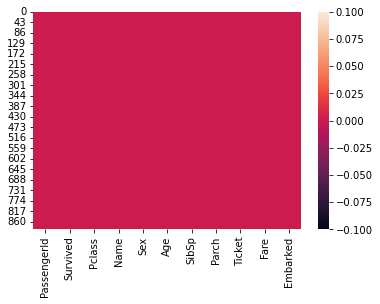

In [105]:
sns.heatmap(Titanic.isnull())

In [106]:
Titanic.duplicated().sum()

0

In [107]:
Titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Univariate Analysis 'Subscribed' variable

In [108]:
#Frequency of 'subscribed'
Titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

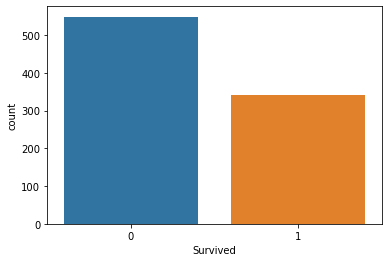

In [109]:
# Plotting the 'subscribed' frequency
sns.countplot(data=Titanic,x='Survived')

In [110]:
#Normalizing the frequency table of 'Survived' variable
Titanic['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [111]:
#Frequency table
Titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# EDA

In [112]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in Titanic.columns:
    if Titanic[i].dtypes=='object':
        Titanic[i]=enc.fit_transform(Titanic[i].values.reshape(-1,1))
Titanic.tail(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
871,872,1,1,79.0,0.0,47.000000,1,1,54.0,52.5542,2.0
872,873,0,1,139.0,1.0,33.000000,0,0,502.0,5.0000,2.0
873,874,0,3,836.0,1.0,47.000000,0,0,303.0,9.0000,2.0
874,875,1,2,4.0,0.0,28.000000,1,0,575.0,24.0000,0.0
875,876,1,3,571.0,0.0,15.000000,0,0,195.0,7.2250,0.0
876,877,0,3,311.0,1.0,20.000000,0,0,504.0,9.8458,2.0
877,878,0,3,657.0,1.0,19.000000,0,0,358.0,7.8958,2.0
878,879,0,3,451.0,1.0,29.699118,0,0,363.0,7.8958,2.0
879,880,1,1,668.0,0.0,56.000000,0,1,59.0,83.1583,0.0
880,881,1,2,739.0,0.0,25.000000,0,1,115.0,26.0000,2.0


In [113]:
Titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name           float64
Sex            float64
Age            float64
SibSp            int64
Parch            int64
Ticket         float64
Fare           float64
Embarked       float64
dtype: object

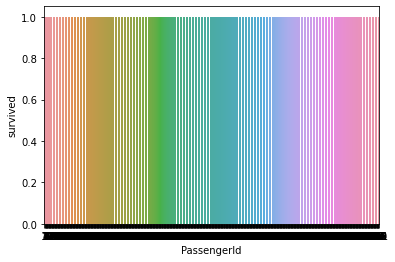

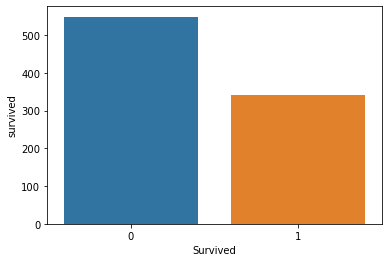

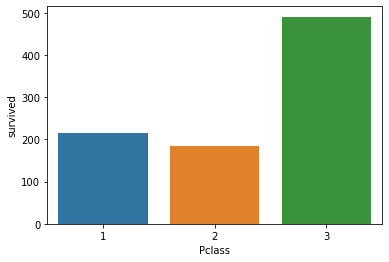

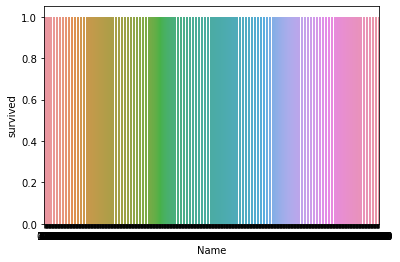

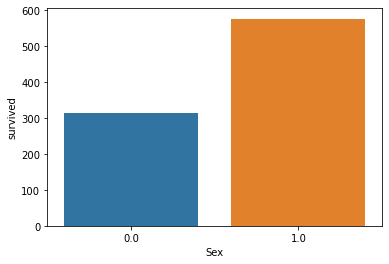

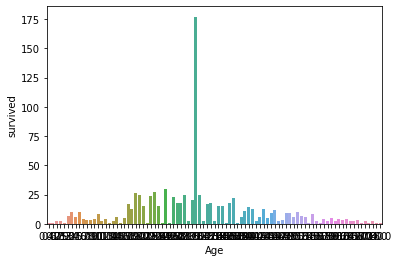

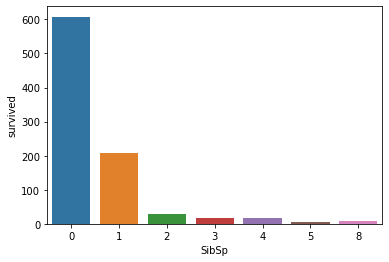

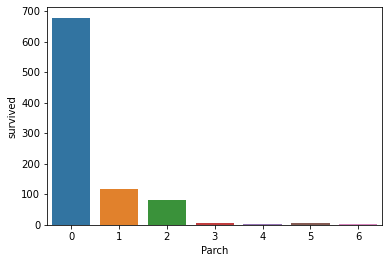

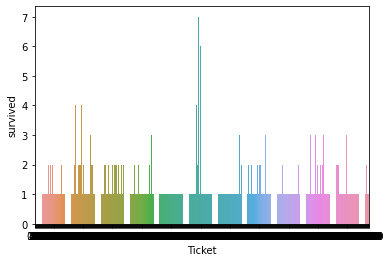

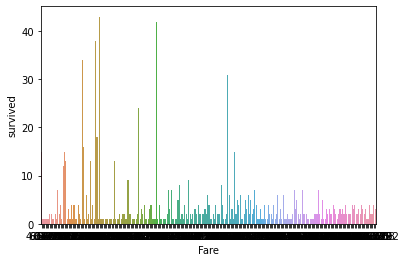

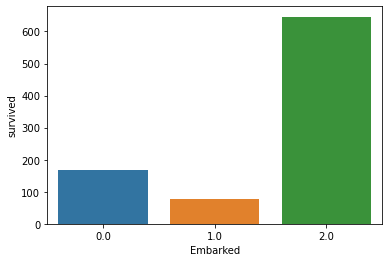

In [114]:
for column in Titanic.columns:
    sns.countplot(x=column, data=Titanic)
    plt.xlabel(column)
    plt.ylabel('survived')
    plt.show()

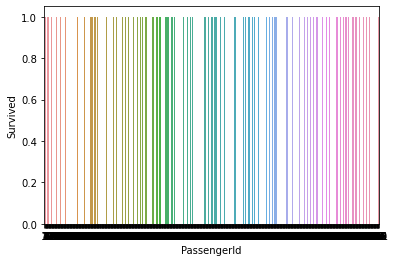

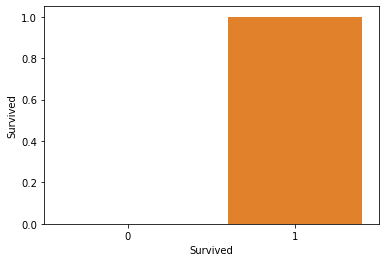

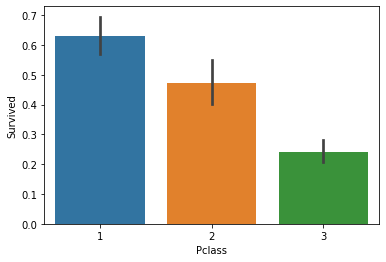

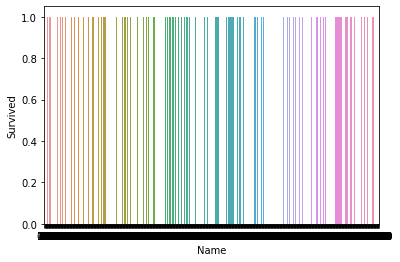

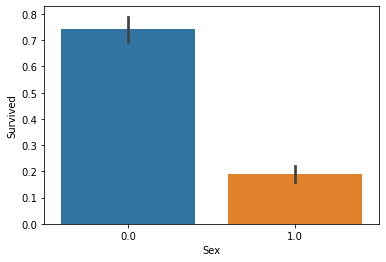

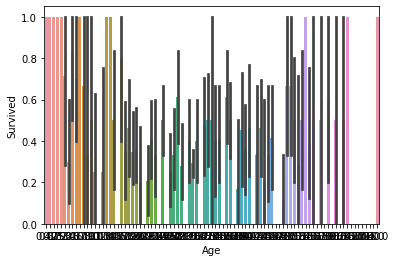

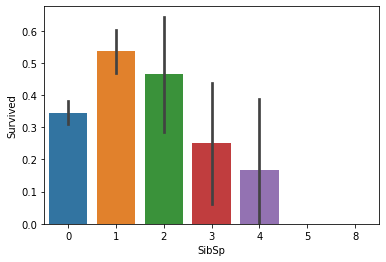

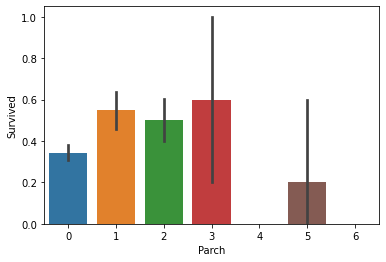

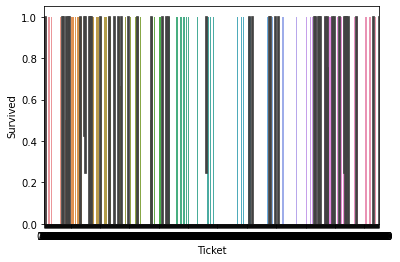

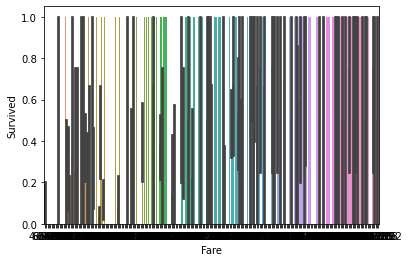

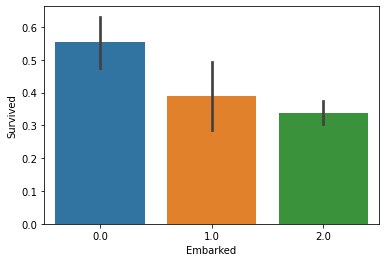

In [115]:
for column in Titanic.columns:
    sns.barplot(x=column,y='Survived',data=Titanic)
    plt.xlabel(column)
    plt.show()

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Name'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Ticket'}>],
       [<AxesSubplot:title={'center':'Fare'}>,
        <AxesSubplot:title={'center':'Embarked'}>, <AxesSubplot:>]],
      dtype=object)

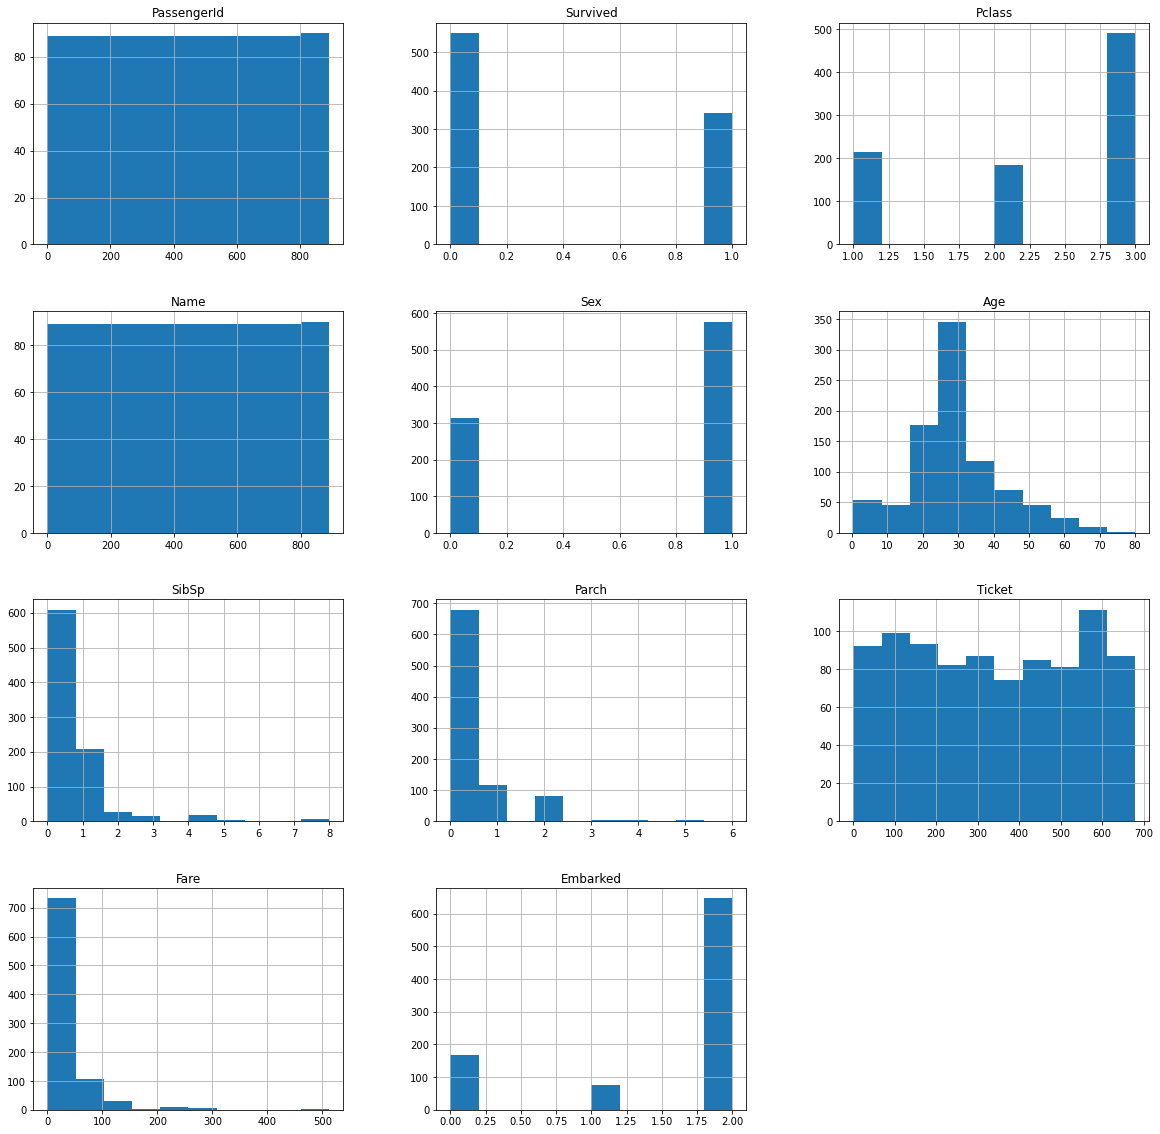

In [116]:
Titanic.hist(bins=10, figsize=(20,20))

# Multivarate 

<AxesSubplot:xlabel='Age', ylabel='Survived'>

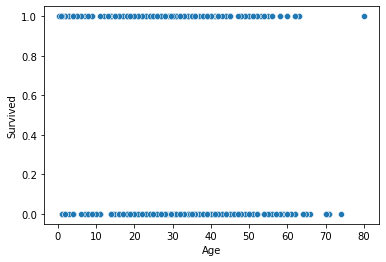

In [117]:
sns.scatterplot(x='Age',y='Survived',data=Titanic)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

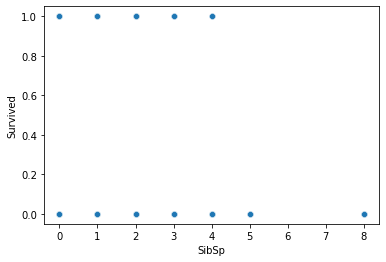

In [118]:
sns.scatterplot(x='SibSp',y='Survived',data=Titanic)

<Figure size 1800x2160 with 0 Axes>

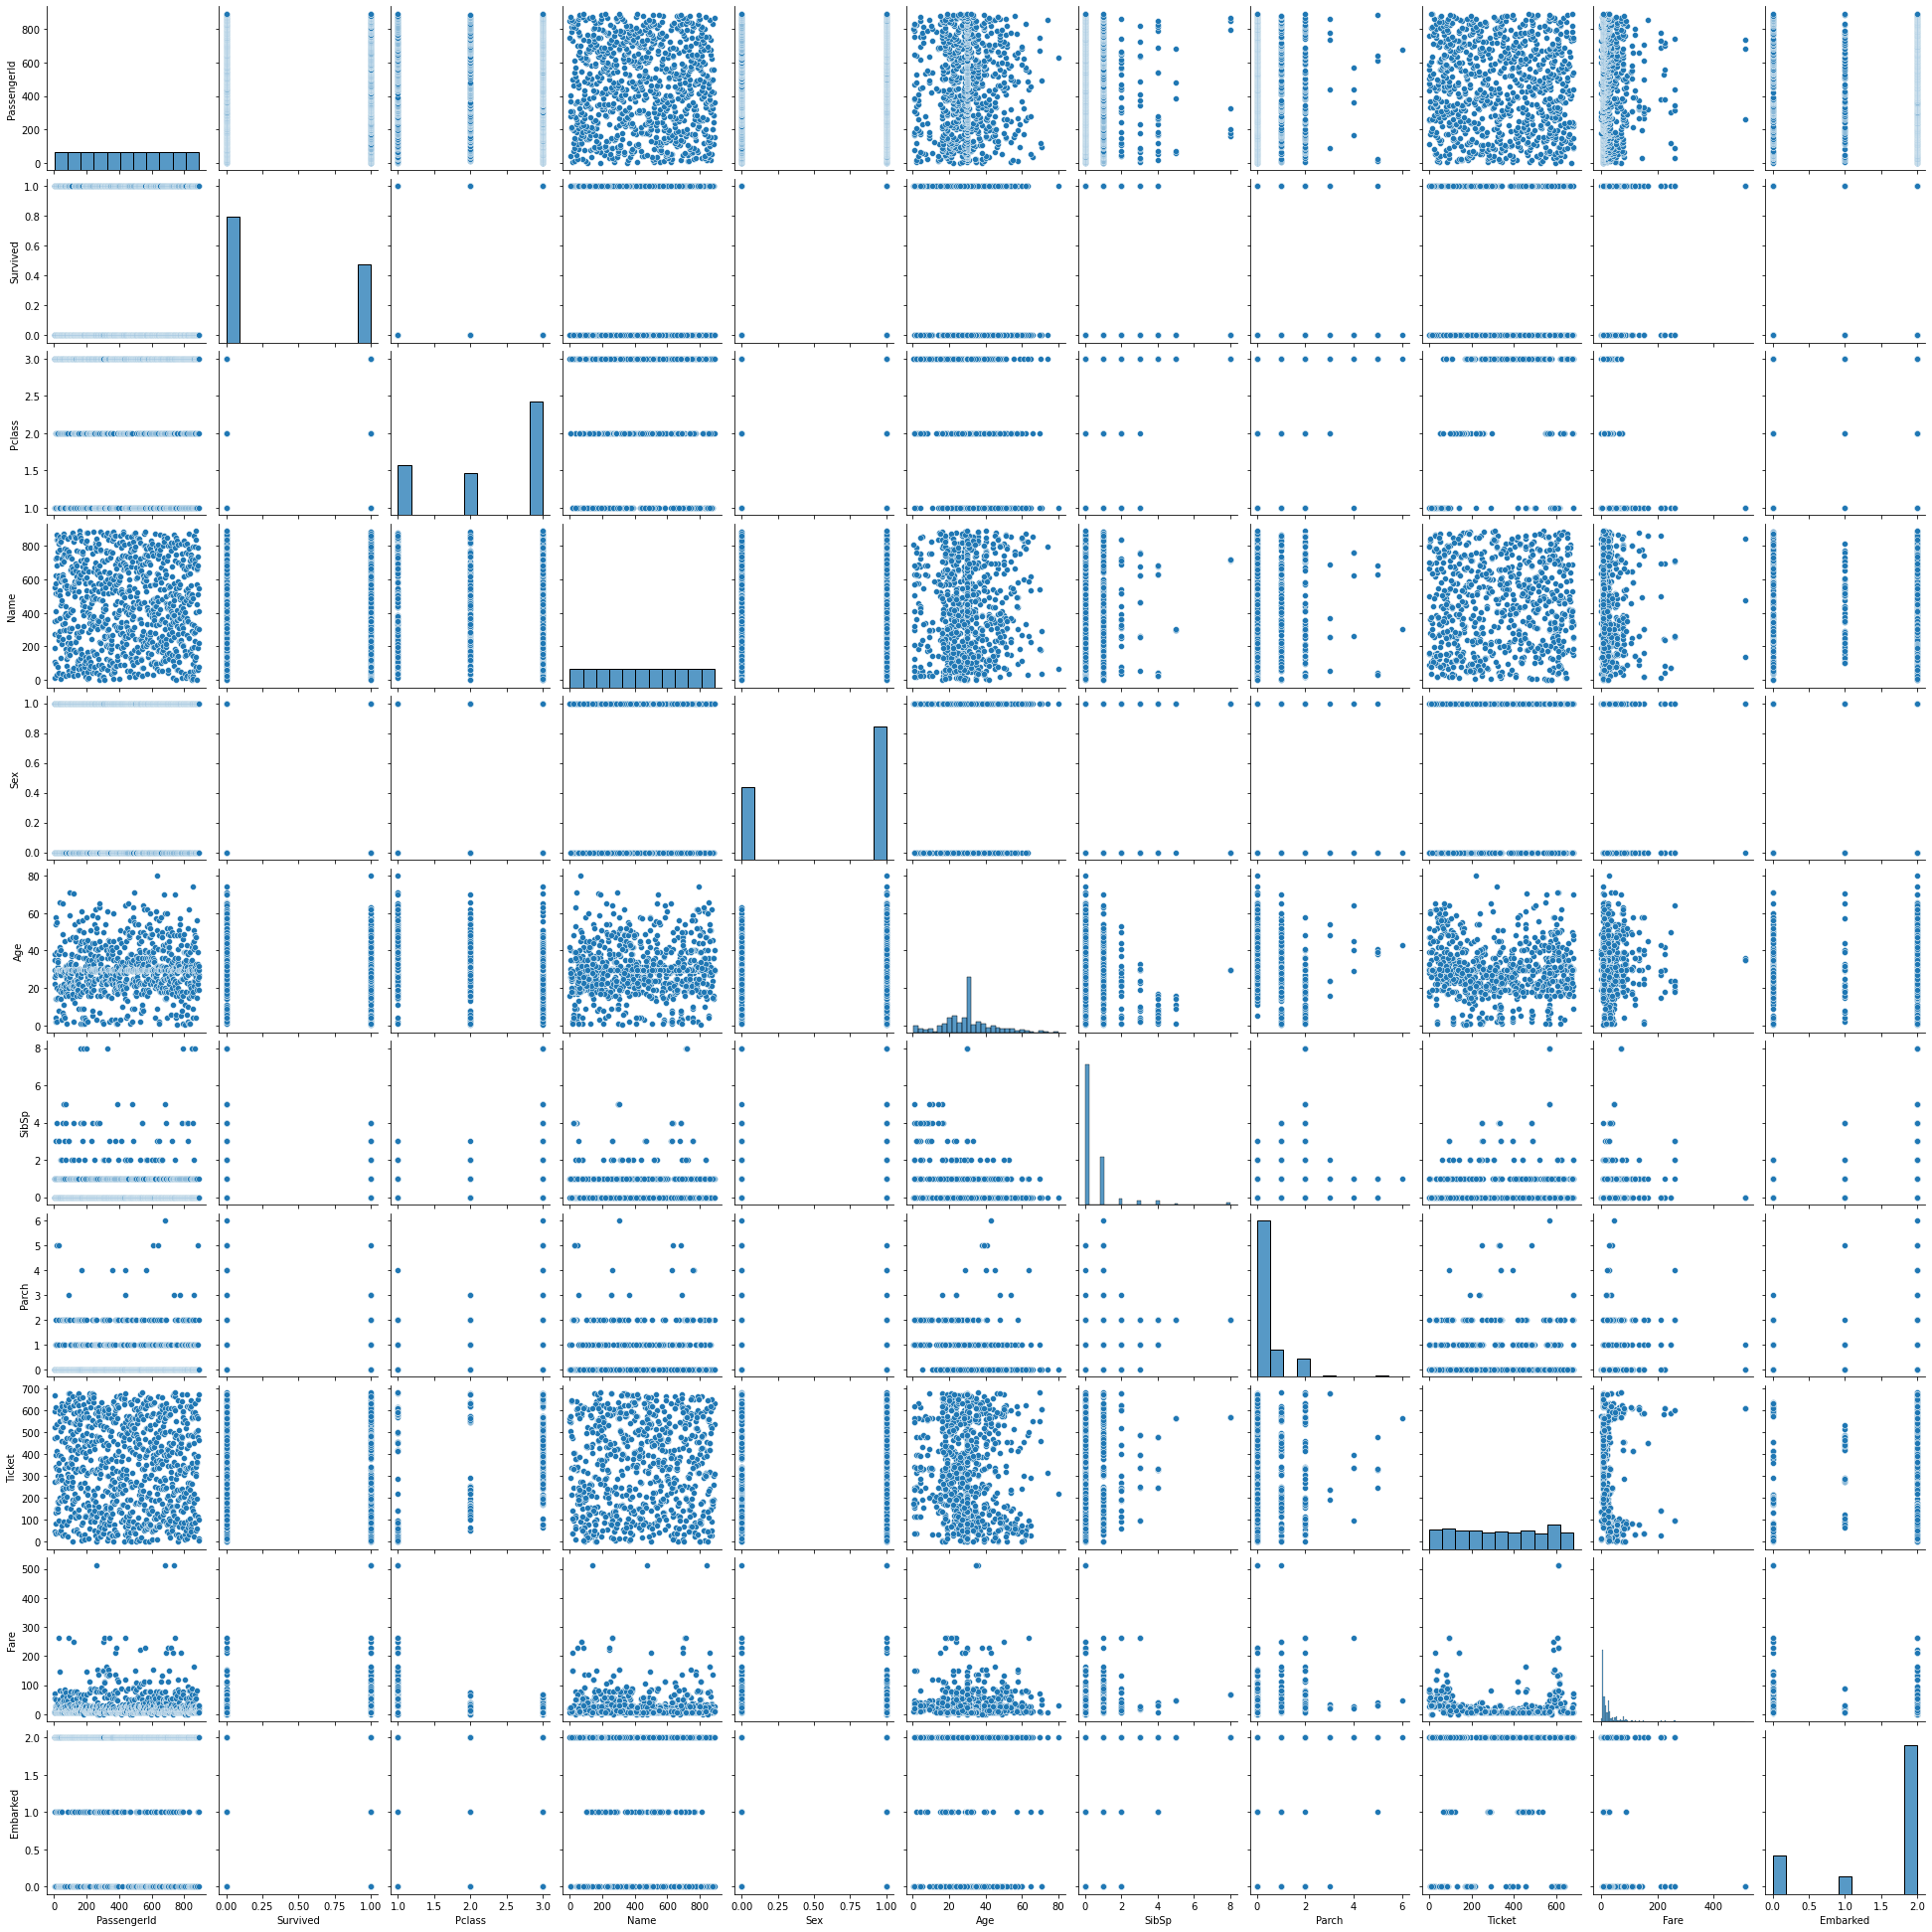

In [119]:
plt.figure(figsize=(25,30))
sns.pairplot(Titanic)
plt.show()

Now Lets See that counts of each columns

In [120]:
for i in Titanic.columns:
        print(Titanic[i].value_counts())
        print('*'*100)

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64
****************************************************************************************************
0    549
1    342
Name: Survived, dtype: int64
****************************************************************************************************
3    491
1    216
2    184
Name: Pclass, dtype: int64
****************************************************************************************************
108.0    1
98.0     1
267.0    1
284.0    1
566.0    1
        ..
431.0    1
518.0    1
411.0    1
428.0    1
220.0    1
Name: Name, Length: 891, dtype: int64
****************************************************************************************************
1.0    577
0.0    314
Name: Sex, dtype: int64
****************************************************************************************************
29.699118    177
24.000000     30
22.000000  

<AxesSubplot:>

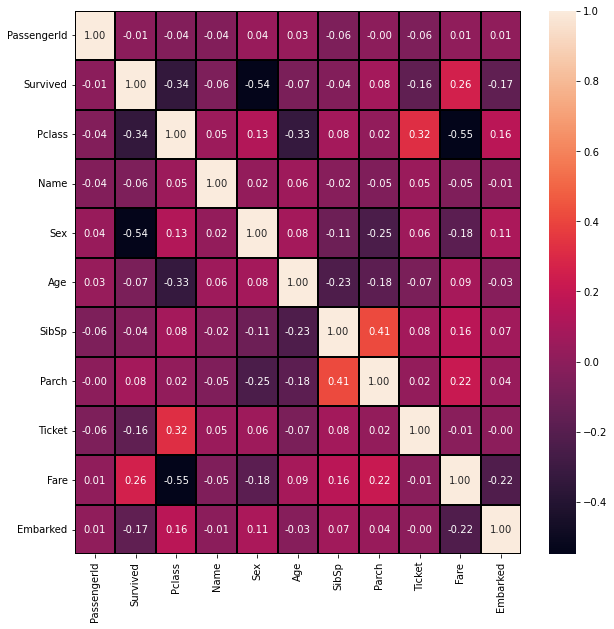

In [121]:
plt.figure(figsize = (10,10))
sns.heatmap(Titanic.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

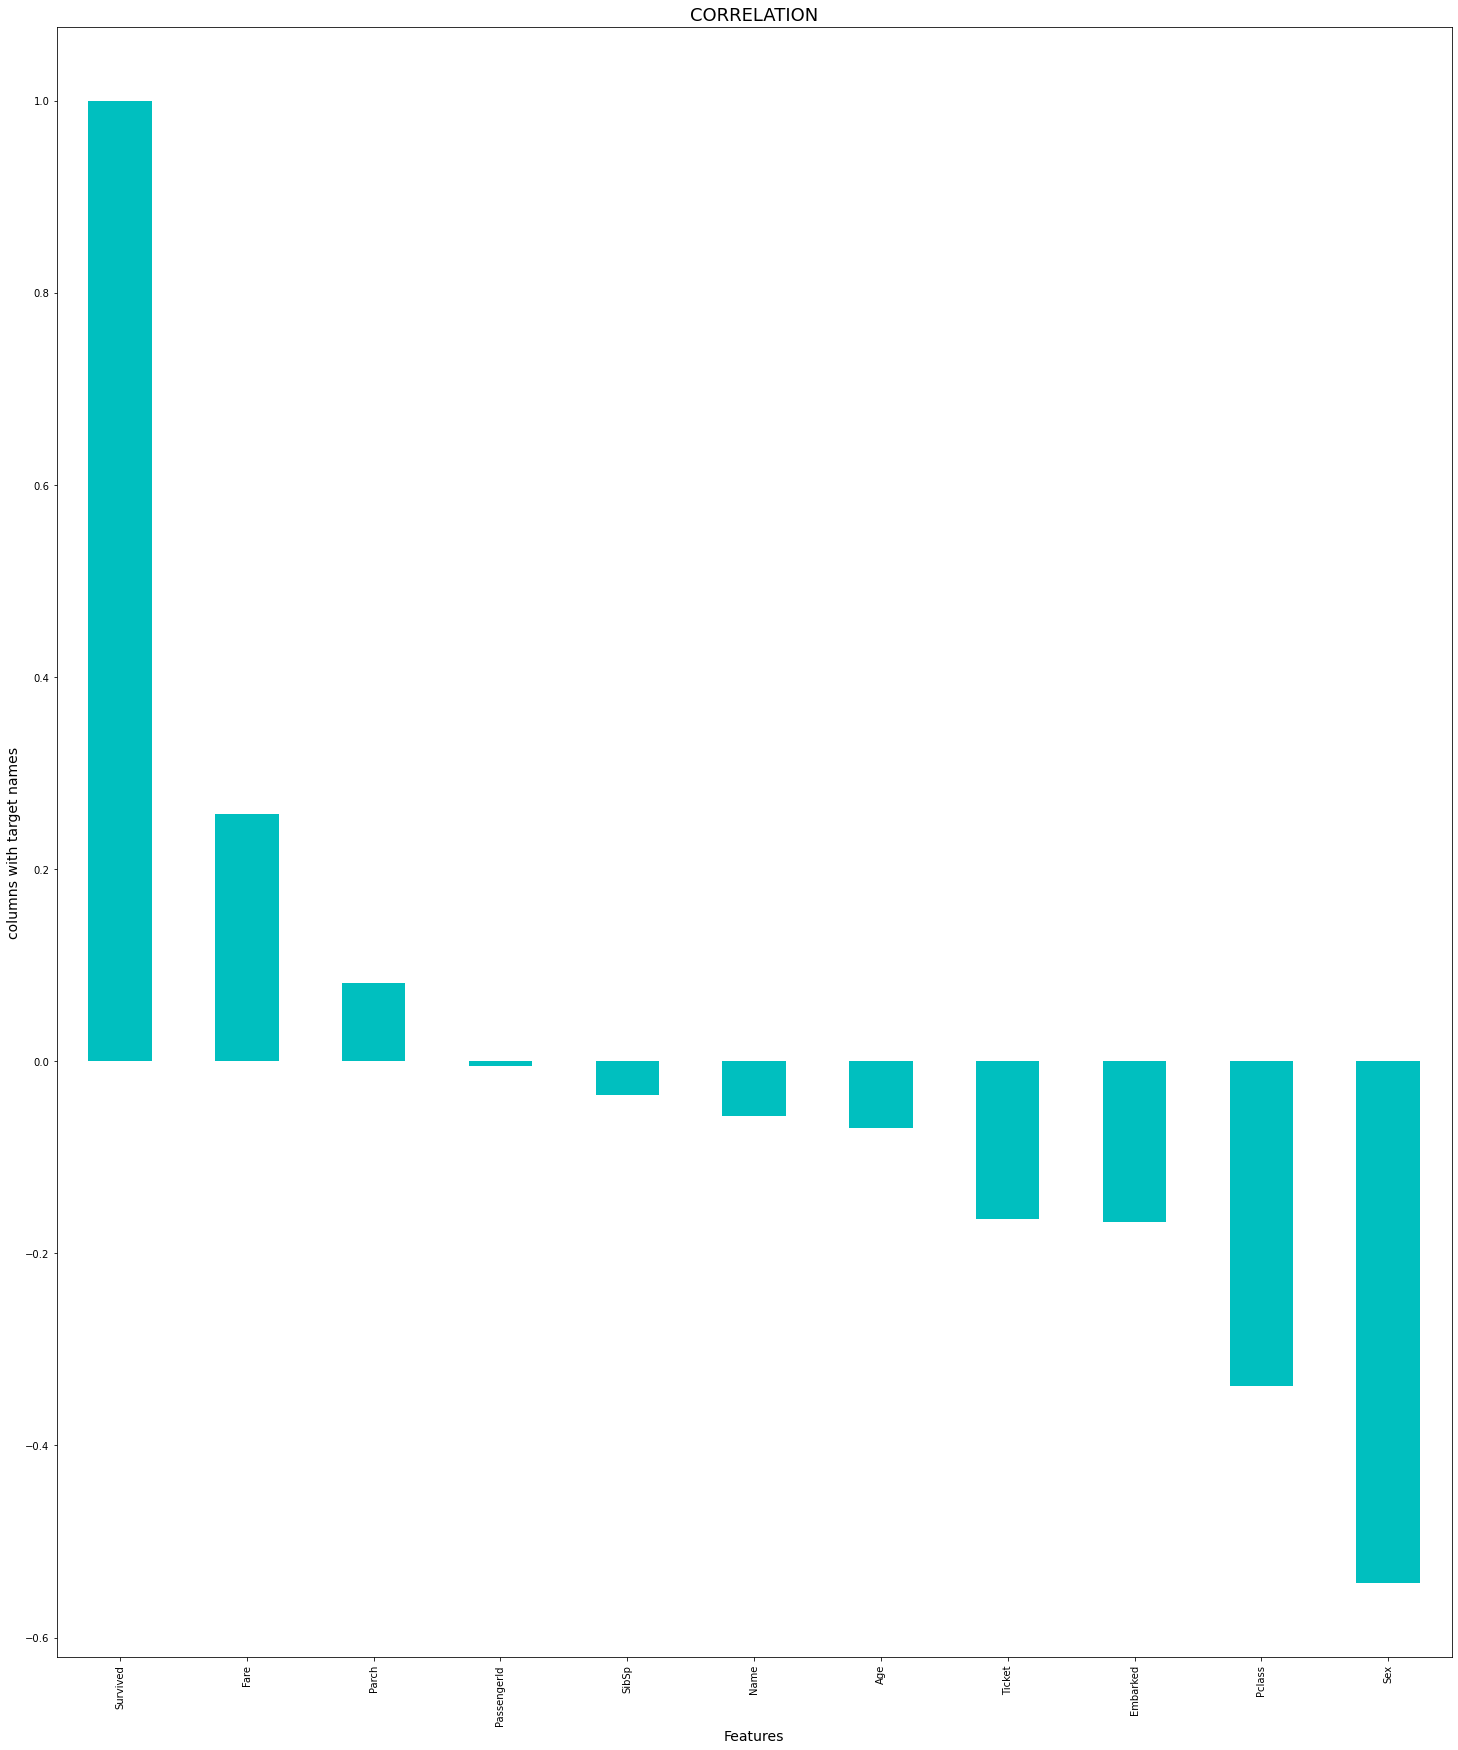

In [122]:
#checking the columns which are positively and negatively correlated
plt.figure(figsize=(25,30))
Titanic.corr()['Survived'].sort_values(ascending=False).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('CORRELATION',fontsize=18)
plt.show()

In [123]:
Titanic.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.033207,-0.057527,-0.001652,-0.056554,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.069809,-0.035322,0.081629,-0.164549,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.331339,0.083081,0.018443,0.319869,-0.549500,0.162098
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.057466,-0.017230,-0.049105,0.047348,-0.049173,-0.006117
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.084153,-0.114631,-0.245489,0.059372,-0.182333,0.108262
Age,0.033207,-0.069809,-0.331339,0.057466,0.084153,1.000000,-0.232625,-0.179191,-0.068848,0.091566,-0.026749
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.232625,1.000000,0.414838,0.079461,0.159651,0.068230
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.179191,0.414838,1.000000,0.020003,0.216225,0.039798
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.068848,0.079461,0.020003,1.000000,-0.013885,-0.001729
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.091566,0.159651,0.216225,-0.013885,1.000000,-0.224719


In [124]:
Titanic.corr()['Survived'].sort_values()

Sex           -0.543351
Pclass        -0.338481
Embarked      -0.167675
Ticket        -0.164549
Age           -0.069809
Name          -0.057343
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

# DESCRIPTIVE STATSTICS

In [125]:
Titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.000000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
Name,891.0,445.000000,257.353842,0.00,222.5000,445.000000,667.5,890.0000
Sex,891.0,0.647587,0.477990,0.00,0.0000,1.000000,1.0,1.0000
Age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
Ticket,891.0,338.528620,200.850657,0.00,158.5000,337.000000,519.5,680.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292


<AxesSubplot:>

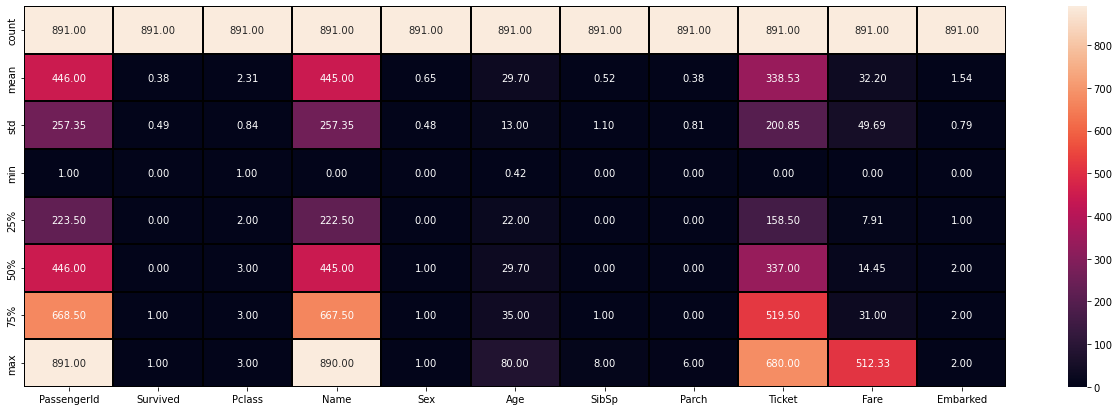

In [126]:
plt.figure(figsize = (22,7))
sns.heatmap(Titanic.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [127]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    float64
 4   Sex          891 non-null    float64
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    float64
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 115.8 KB


OUTLIERS CHECKING(Any One outlier method can be  used)

In [128]:
colmlist=Titanic.columns.values
ncol=30
nrows=14

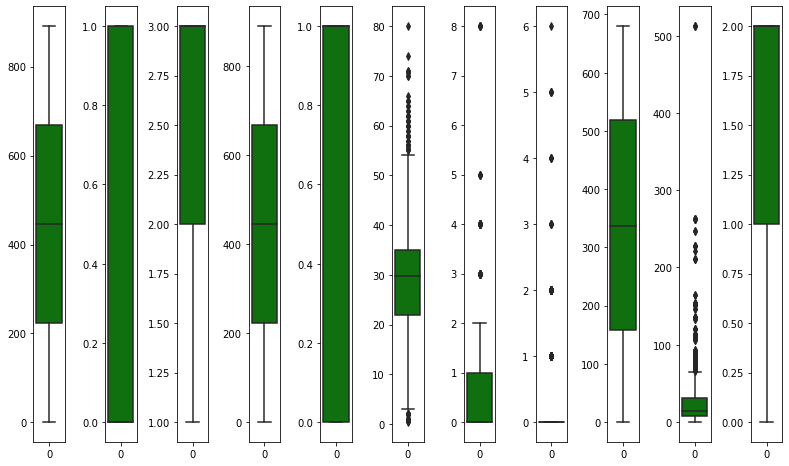

In [129]:
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(colmlist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data= Titanic[colmlist[i]],color='green',orient='v')
    plt.tight_layout()

PassengerId       AxesSubplot(0.125,0.125;0.0596154x0.755)
Survived       AxesSubplot(0.196538,0.125;0.0596154x0.755)
Pclass         AxesSubplot(0.268077,0.125;0.0596154x0.755)
Name           AxesSubplot(0.339615,0.125;0.0596154x0.755)
Sex            AxesSubplot(0.411154,0.125;0.0596154x0.755)
Age            AxesSubplot(0.482692,0.125;0.0596154x0.755)
SibSp          AxesSubplot(0.554231,0.125;0.0596154x0.755)
Parch          AxesSubplot(0.625769,0.125;0.0596154x0.755)
Ticket         AxesSubplot(0.697308,0.125;0.0596154x0.755)
Fare           AxesSubplot(0.768846,0.125;0.0596154x0.755)
Embarked       AxesSubplot(0.840385,0.125;0.0596154x0.755)
dtype: object

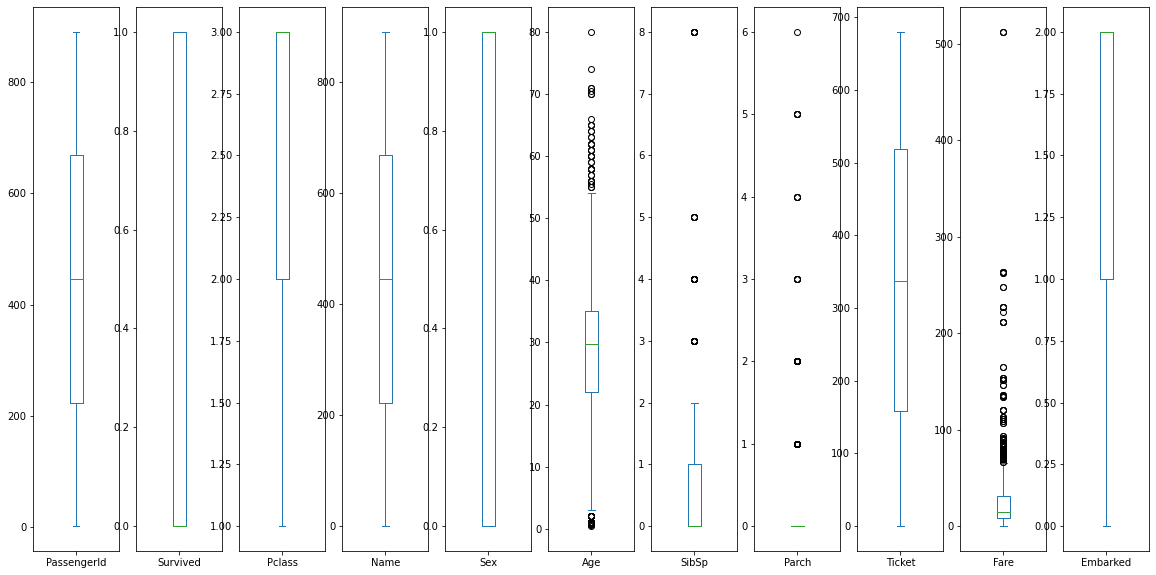

In [130]:
# to find out outliers in the dataset
Titanic.plot(kind='box',subplots=True,figsize=(20,10))

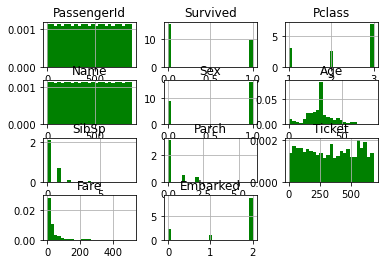

In [131]:
#Lets plot all using Histogram and see the skewness again
 
#plt.rcParams['figure.figsize']=(20,20)
Titanic.hist(bins=25,color='green',density=True,label='Value',histtype='bar')
plt.show()

WE can see only density and pH are little normally distributed rest all are skewed or unbalanced data
fixed acidity,volatile acidity ,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
Lets take some of the data and do some of the plotting of skewness although we can see all skewed columns on above plotting

<AxesSubplot:xlabel='Age', ylabel='Density'>

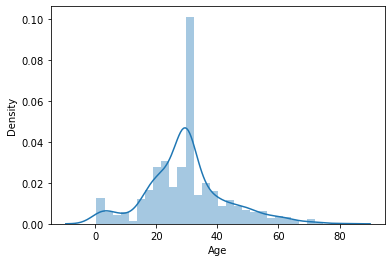

In [132]:
sns.distplot(Titanic['Age'])

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

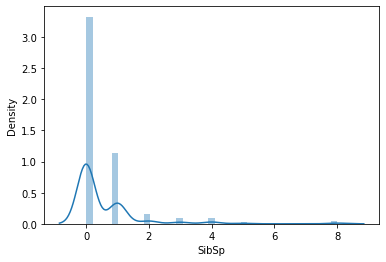

In [133]:
 sns.distplot(Titanic['SibSp'])
    

<AxesSubplot:xlabel='Parch', ylabel='Density'>

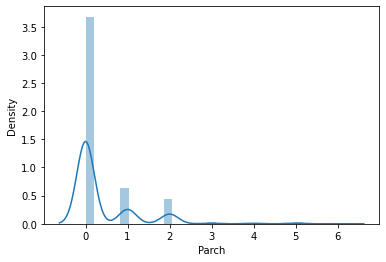

In [134]:
sns.distplot(Titanic['Parch'])
    

the data of the column is not normalised ...The building block is out of normalized curve..It a right skewed data..
we can see that the data is not normally distributed

Normal distribution curve of outcome column is irrelevent

In [135]:
#to check for outliers through zscore 
from scipy.stats import zscore
(np.abs(zscore( Titanic)) < 3).all()

PassengerId     True
Survived        True
Pclass          True
Name            True
Sex             True
Age            False
SibSp          False
Parch          False
Ticket          True
Fare           False
Embarked        True
dtype: bool

In [136]:
#to remove outliers in data set through zscore
z = np.abs(zscore( Titanic))
z.shape

(891, 11)

In [137]:
threshold = 3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([7, 6, 7, 9, 6, 6, 6, 6, 7, 9, 5, 5, 9, 6, 6, 6, 7, 6, 6, 6, 6, 6,
       9, 6, 6, 6, 9, 9, 6, 9, 7, 9, 9, 6, 7, 7, 9, 6, 5, 9, 6, 6, 9, 7,
       7, 5, 7, 5, 7, 9, 6, 6, 9, 9, 9, 9, 7, 9, 9, 5, 7, 9, 6, 6, 6, 6,
       6, 6, 5, 7, 6, 7], dtype=int64))


In [138]:
Titanic_new=Titanic[(z<3).all(axis=1)]
print(Titanic.shape)
print(Titanic.shape)

(891, 11)
(891, 11)


In [139]:
Titanic.shape

(891, 11)

In [140]:
print ("Old DataFrame =",Titanic.shape)
print ("New DataFrame =",Titanic_new.shape)
print ("Total dropped rows = ",Titanic.shape[0] - Titanic_new.shape[0])

Old DataFrame = (891, 11)
New DataFrame = (820, 11)
Total dropped rows =  71


In [141]:
#to find % loss in data
loss = (891-820)/891 * 100
print(loss)

7.968574635241302


In [142]:
Titanic_new

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108.0,1.0,22.000000,1,0,523.0,7.2500,2.0
1,2,1,1,190.0,0.0,38.000000,1,0,596.0,71.2833,0.0
2,3,1,3,353.0,0.0,26.000000,0,0,669.0,7.9250,2.0
3,4,1,1,272.0,0.0,35.000000,1,0,49.0,53.1000,2.0
4,5,0,3,15.0,1.0,35.000000,0,0,472.0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548.0,1.0,27.000000,0,0,101.0,13.0000,2.0
887,888,1,1,303.0,0.0,19.000000,0,0,14.0,30.0000,2.0
888,889,0,3,413.0,0.0,29.699118,1,2,675.0,23.4500,2.0
889,890,1,1,81.0,1.0,26.000000,0,0,8.0,30.0000,0.0


In [143]:
# Independent column

x=Titanic_new.iloc[:,2:]
x

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,108.0,1.0,22.000000,1,0,523.0,7.2500,2.0
1,1,190.0,0.0,38.000000,1,0,596.0,71.2833,0.0
2,3,353.0,0.0,26.000000,0,0,669.0,7.9250,2.0
3,1,272.0,0.0,35.000000,1,0,49.0,53.1000,2.0
4,3,15.0,1.0,35.000000,0,0,472.0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...
886,2,548.0,1.0,27.000000,0,0,101.0,13.0000,2.0
887,1,303.0,0.0,19.000000,0,0,14.0,30.0000,2.0
888,3,413.0,0.0,29.699118,1,2,675.0,23.4500,2.0
889,1,81.0,1.0,26.000000,0,0,8.0,30.0000,0.0


In [144]:
x.shape

(820, 9)

In [145]:
# Target or dependent variable

y=Titanic_new.iloc[0:,1]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 820, dtype: int64

In [146]:
y.shape

(820,)

# TRANSFORMING DATA TO REMOVE SKEWNESS

In [147]:
Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108.0,1.0,22.000000,1,0,523.0,7.2500,2.0
1,2,1,1,190.0,0.0,38.000000,1,0,596.0,71.2833,0.0
2,3,1,3,353.0,0.0,26.000000,0,0,669.0,7.9250,2.0
3,4,1,1,272.0,0.0,35.000000,1,0,49.0,53.1000,2.0
4,5,0,3,15.0,1.0,35.000000,0,0,472.0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548.0,1.0,27.000000,0,0,101.0,13.0000,2.0
887,888,1,1,303.0,0.0,19.000000,0,0,14.0,30.0000,2.0
888,889,0,3,413.0,0.0,29.699118,1,2,675.0,23.4500,2.0
889,890,1,1,81.0,1.0,26.000000,0,0,8.0,30.0000,0.0


In [148]:
Titanic.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Name           0.000000
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Ticket         0.000246
Fare           4.787317
Embarked      -1.264823
dtype: float64

In [149]:
from sklearn.preprocessing import power_transform
x_new=power_transform(Titanic,method='yeo-johnson')

In [150]:
pd.DataFrame(x_new).skew()

0    -0.283201
1     0.478523
2    -0.441438
3    -0.288132
4    -0.618921
5     0.064420
6     0.808608
7     1.228795
8    -0.299695
9    -0.040329
10   -1.064527
dtype: float64

In [151]:
# It will be a 2 dimensional data containg rows and columns

from sklearn.preprocessing import StandardScaler
#transforming my dataset into a standard normal distribution
sc=StandardScaler()

x= pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.833995,-1.344994,0.722036,-0.641702,1.051956,-0.451141,0.952215,-0.623707,0.583162
1,-1.586804,-1.022273,-1.384973,0.675821,1.051956,-0.451141,1.315349,1.525109,-1.953669
2,0.833995,-0.380767,-1.384973,-0.312321,-0.563407,-0.451141,1.678482,-0.601055,0.583162
3,-1.586804,-0.699552,-1.384973,0.428785,1.051956,-0.451141,-1.405665,0.914918,0.583162
4,0.833995,-1.711007,0.722036,0.428785,-0.563407,-0.451141,0.698519,-0.596861,0.583162
...,...,...,...,...,...,...,...,...,...
815,-0.376405,0.386680,0.722036,-0.229976,-0.563407,-0.451141,-1.146995,-0.430749,0.583162
816,-1.586804,-0.577548,-1.384973,-0.888737,-0.563407,-0.451141,-1.579770,0.139733,0.583162
817,0.833995,-0.144629,-1.384973,-0.007717,1.051956,3.088912,1.708329,-0.080071,0.583162
818,-1.586804,-1.451256,0.722036,-0.312321,-0.563407,-0.451141,-1.609617,0.139733,-1.953669


In [152]:
x.mean()

Pclass     -1.659919e-16
Name        6.566563e-17
Sex        -6.282238e-17
Age         2.998956e-16
SibSp       7.852797e-17
Parch      -3.791005e-18
Ticket      6.458249e-17
Fare        1.963199e-17
Embarked   -1.031695e-16
dtype: float64

In [153]:
x.std()

Pclass      1.00061
Name        1.00061
Sex         1.00061
Age         1.00061
SibSp       1.00061
Parch       1.00061
Ticket      1.00061
Fare        1.00061
Embarked    1.00061
dtype: float64

Balancing the dataset over here,otherwise it will be a baised dataset

In [154]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [155]:
x.shape

(1000, 9)

In [156]:
y.value_counts()

0    500
1    500
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

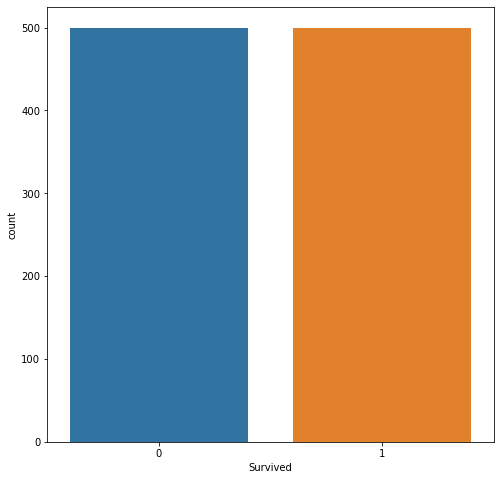

In [157]:
plt.figure(figsize=(8,8))
sns.countplot(y)

WE CHECK MULTICOLLINEARITY BY VARIANCE INFLATION FACTOR (VIF)

In [158]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [159]:
vif_cal()

   VIF FACTOR  FEATURES
0    2.399128    Pclass
1    1.016455      Name
2    1.130903       Sex
3    1.292785       Age
4    1.182235     SibSp
5    1.279291     Parch
6    1.148844    Ticket
7    2.313547      Fare
8    1.067077  Embarked


# No Multicollinearity is present in the dataset...Here we can observe all the columns have VIF less than 10 which means we are free from multicollinearity problem. Let's move to buliding machine learning models...


In [160]:
# to predict best random state value
maxAcc =0
maxRS=0

for i in range(1,820):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best accuracy is',maxAcc,'on Random_State',maxRS)

Best accuracy is 0.86 on Random_State 75


In [161]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=75)

In [162]:
print('shape of x_train:',x_train.shape)
print('shape of y_train:',x_train.shape)
print('shape of x_test:',x_test.shape)
print('shape of y_test:',y_test.shape)

shape of x_train: (800, 9)
shape of y_train: (800, 9)
shape of x_test: (200, 9)
shape of y_test: (200,)


In [163]:
x_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
747,0.833995,-1.730685,0.722036,-0.312321,-0.563407,-0.451141,0.036920,-0.602314,0.583162
32,0.833995,0.217448,0.722036,-0.007717,-0.563407,-0.451141,-0.644577,-0.624405,-1.953669
317,0.833995,-0.955367,-1.384973,-0.007717,1.051956,-0.451141,0.753238,-0.326720,0.583162
607,0.833995,0.614946,-1.384973,-0.007717,-0.563407,-0.451141,-0.271495,-0.604270,-0.685254
981,-1.586804,-0.895769,-0.666747,-0.139618,1.051956,-0.451141,-1.265473,2.145731,-1.953669
...,...,...,...,...,...,...,...,...,...
136,-0.376405,-1.502419,0.722036,1.746308,-0.563407,-0.451141,1.444684,-0.446689,0.583162
465,0.833995,0.000989,-1.384973,0.593475,-0.563407,-0.451141,0.788059,-0.545265,0.583162
19,-0.376405,-1.455191,0.722036,0.346440,-0.563407,-0.451141,-0.893299,-0.430749,0.583162
368,0.833995,-0.124951,-1.384973,-0.724047,1.051956,-0.451141,0.798008,-0.537295,0.583162


In [164]:
y_test

16     0
955    1
750    0
82     0
215    1
      ..
676    0
612    0
294    1
268    0
223    0
Name: Survived, Length: 200, dtype: int64

In [165]:
x_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
16,0.833995,1.531945,-1.384973,0.099404,1.051956,-0.451141,-0.152108,-0.262961,0.583162
955,-0.675197,-0.154710,-1.384973,-1.073755,-0.563407,-0.014202,1.462814,-0.275240,0.583162
750,0.833995,1.433555,0.722036,0.058232,-0.563407,-0.451141,0.474670,-0.596861,0.583162
82,-1.586804,-1.179698,0.722036,1.334582,1.051956,-0.451141,1.723252,1.185897,0.583162
215,-0.376405,-1.093114,-1.384973,-1.794534,-0.563407,3.088912,1.116372,0.013891,0.583162
...,...,...,...,...,...,...,...,...,...
676,0.833995,-0.408316,0.722036,-1.547499,-0.563407,-0.451141,-0.574935,-0.236534,-1.953669
612,-0.376405,-0.856977,0.722036,-0.559357,-0.563407,-0.451141,-0.450574,-0.430749,0.583162
294,-0.376405,1.228903,-1.384973,0.017059,-0.563407,-0.451141,-1.032583,-0.452562,-0.685254
268,0.833995,0.359130,0.722036,-0.477012,-0.563407,-0.451141,0.211025,-0.602035,0.583162


In [166]:
y_train

747    0
32     1
317    1
607    1
981    1
      ..
136    0
465    0
19     1
368    0
248    0
Name: Survived, Length: 800, dtype: int64

CROSS VALIDATION FOR LOGISTICS REGRESSION,ENSEMBLE TECHNIQUE(GradientBoostingClassifier,RandomForestClassifier)

In [1]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
gb = GradientBoostingClassifier()
RF = RandomForestClassifier()
ada = AdaBoostClassifier()

model=[lg,gnb,svc,dtc,knn,RF,gb,ada]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy_score:",m,'is')
    print(confusion_matrix(y_test, predm))
    print(accuracy_score(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

NameError: name 'LogisticRegression' is not defined

In [ ]:
#cross validation to check the accuracy score
print('cross validation score of random forest model = ', cross_val_score(RF,x,y,cv=None).mean())
print('cross validation score of logistic regression model = ', cross_val_score(lg,x,y,cv=None).mean())
print('cross validation score of decison tree model = ', cross_val_score(dtc,x,y,cv=None).mean())
print('cross validation score of  KNeighborsClassifier model = ', cross_val_score(knn,x,y,cv=None).mean())
print('cross validation score of standard vector machine model = ', cross_val_score(svc,x,y,cv=None).mean())
print('cross validation score of GaussianNB model = ', cross_val_score(gnb,x,y,cv=None).mean())
print('cross validation score of GradientBoostingClassifier model = ',cross_val_score(gb,x,y,cv=None).mean())
print('cross validation score of AdaBoostingClassifier model = ',cross_val_score(ada,x,y,cv=None).mean())

Hyper parameter tuning

Plotting ROC and compare AUC for all the models used

In [ ]:
# hyperparameter tuning with RandomForestClassifier, parameters of RandomForestClassifier
parameters ={'n_estimators':[200], 'criterion':['gini'], 
             'min_samples_split':[5], 'min_samples_leaf':[2], 
              'bootstrap':[True],'n_jobs':[-1], 'random_state':[504]}


In [ ]:
# hyperparameter tuning with gridsearchCV
gcv = GridSearchCV(RandomForestClassifier(random_state=1083), parameters, verbose=1, cv=10, n_jobs=-1)

In [ ]:
#training the model
gcv.fit(x_train,y_train)

In [ ]:
#finding out which parameter is giving best accuracy
gcv.best_params_

In [ ]:
type(gcv)

In [ ]:
# finding best estimator
gcv.best_estimator_

In [ ]:
# Applying the parameters to the final model
pred = gcv.best_estimator_.predict(x_test)
acc =accuracy_score(y_test,pred)
print(acc*100)

ROC AUC Scores

In [ ]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(gcv, x_test, y_test)
#rfc_disp = RocCurveDisplay.from_estimator(rfc, x_test, y_test, ax=svc_disp.ax_)
plt.title("AUC ROC plot")
plt.show()

In [ ]:
gsv=GridSearchCV
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_pred,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC Curve(area=%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#saving the model
import joblib
joblib.dump(gcv,'Titanic Final.pkl')

In [ ]:
#Loading the saved model
TT=joblib.load('Titanic Final.pkl')

In [ ]:
prediction = TT.predict(x_test)
prediction

In [ ]:
pd.DataFrame([TT.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

Let's now make the prediction on test dataset